<a href="https://colab.research.google.com/github/lilyaYAHIAOUI/bloods.ai/blob/main/blood_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


In [1]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
maindir = "/content/drive/MyDrive/competition/Zindi/bloods.ai/data" # Directory with your files
traincsv = maindir+"/Update_train.csv"
testcsv = maindir+"/Updated_Test.csv"

In [3]:
train = pd.read_csv(traincsv)
train.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,0.600688,0.612949,0.617855,0.621710,0.622049,0.623373,0.620610,0.619479,0.616463,0.612414,0.609885,0.605408,0.602115,0.597710,0.593485,0.592332,0.588680,0.587396,0.585577,0.585244,0.583597,0.584460,0.584548,0.586147,0.589067,0.591360,0.595636,0.599054,0.602856,0.607817,...,1.468505,1.454910,1.434286,1.443249,1.417403,1.418581,1.403326,1.395943,1.386288,1.381532,1.372256,1.367083,1.362999,1.353013,1.345374,1.341283,1.323804,1.331071,1.332295,1.328928,1.309800,1.328064,1.329464,1.314664,1.313583,1.313329,1.312243,1.310330,1.353629,1.336609,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,0.608619,0.619217,0.625162,0.627111,0.629326,0.628116,0.627815,0.623644,0.620762,0.617781,0.613032,0.610404,0.605528,0.602216,0.598417,0.595489,0.593692,0.591697,0.590110,0.589316,0.589131,0.587455,0.589060,0.589305,0.591252,0.594853,0.598545,0.601338,0.605673,0.610725,...,1.477741,1.457003,1.445143,1.439036,1.434363,1.422782,1.408831,1.405730,1.394905,1.386579,1.373887,1.376208,1.360633,1.358802,1.353009,1.344997,1.332883,1.324965,1.339512,1.336343,1.322957,1.311612,1.316437,1.316180,1.316063,1.320698,1.321068,1.286939,1.301804,1.314457,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,0.607972,0.617558,0.624398,0.626222,0.627771,0.626445,0.623953,0.622616,0.618701,0.615181,0.611624,0.608587,0.605730,0.601288,0.597154,0.595654,0.592535,0.591893,0.589885,0.588528,0.587108,0.586997,0.589043,0.588888,0.591670,0.594962,0.597498,0.600767,0.604963,0.612166,...,1.468838,1.456374,1.450920,1.438182,1.434188,1.427201,1.413866,1.403336,1.404049,1.383698,1.378195,1.374761,1.373550,1.362671,1.350157,1.344038,1.341004,1.335655,1.333660,1.325491,1.335868,1.334114,1.327512,1.339627,1.322394,1.328299,1.311948,1.310330,1.311108,1.283048,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,0.607109,0.616252,0.622437,0.625715,0.626799,0.625676,0.625084,0.622652,0.618510,0.614896,0.611060,0.608285,0.603976,0.600319,0.596856,0.594169,0.591334,0.589620,0.589549,0.587194,0.586685,0.587205,0.587368,0.588510,0.592029,0.593472,0.597904,0.601190,0.604864,0.610652,...,1.474065,1.456521,1.456408,1.445327,1.429233,1.422914,1.422161,1.405341,1.403060,1.390475,1.381461,1.370967,1.370843,1.358100,1.362090,1.352020,1.340746,1.345123,1.332574,1.345660,1.349603,1.329325,1.331542,1.347718,1.321111,1.320285,1.303363,1.306762,1.297632,1.314811,1.314408,1.342224,3,0.0026,39.60,43.89,low,ok,high,2250
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,0.606031,0.617109,0.624688,0.626810,0.628163,0.627580,0.625115,0.623415

# data exploration 

In [4]:
print(train.columns)


Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human', 'donation_id'],
      dtype='object', length=178)


In [5]:
train.drop(["id","std","donation_id"], axis=1, inplace=True)


In [6]:
print(train.shape)
#train.drop(["Reading_ID"], axis=1, inplace=True)

(29160, 175)


In [7]:
columns_list =train.columns
numerical_features = columns_list[0:172]
categorical_features = columns_list[172:175]


In [8]:
print(numerical_features)
print(len(numerical_features))

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance162', 'absorbance163', 'absorbance164', 'absorbance165',
       'absorbance166', 'absorbance167', 'absorbance168', 'absorbance169',
       'temperature', 'humidity'],
      dtype='object', length=172)
172


In [9]:
print(categorical_features)
print(len(categorical_features))

Index(['hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human'],
      dtype='object')
3


In [10]:
train.isna().sum()# there is no missing values

absorbance0              0
absorbance1              0
absorbance2              0
absorbance3              0
absorbance4              0
                        ..
temperature              0
humidity                 0
hdl_cholesterol_human    0
hemoglobin(hgb)_human    0
cholesterol_ldl_human    0
Length: 175, dtype: int64

In [11]:
train.describe()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
count,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,...,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000
mean,0.501233,0.505343,0.509430,0.513951,0.520390,0.527901,0.534790,0.539878,0.547992,0.560161,0.573231,0.584865,0.591764,0.595015,0.597245,0.597476,0.596234,0.593176,0.590128,0.586859,0.583380,0.580590,0.577153,0.573811,0.570559,0.567760,0.565109,0.563297,0.561450,0.560132,0.559385,0.558960,0.559301,0.560660,0.562233,0.564392,0.567547,0.571194,0.575372,0.579341,...,1.517056,1.503816,1.490524,1.478711,1.466030,1.454837,1.443866,1.432170,1.421440,1.410438,1.398836,1.388896,1.380949,1.368948,1.359843,1.351792,1.342777,1.335093,1.328423,1.321105,1.314336,1.307740,1.301375,1.296554,1.292324,1.289362,1.286892,1.285190,1.284263,1.282959,1.279894,1.274193,1.264868,1.256808,1.250286,1.247337,1.261093,1.249279,41.243166,35.340352
std,0.154276,0.114408,0.108543,0.131905,0.130735,0.127874,0.115413,0.122235,0.120122,0.121974,0.122100,0.122428,0.122420,0.123848,0.120746,0.123876,0.118330,0.124504,0.120742,0.122620,0.126951,0.122032,0.126385,0.122497,0.127048,0.121386,0.123169,0.121251,0.124350,0.123667,0.123990,0.127588,0.129428,0.122728,0.123987,0.128728,0.122952,0.127169,0.120845,0.123935,...,0.150064,0.145629,0.151301,0.142372,0.142234,0.140698,0.141328,0.143853,0.141736,0.137787,0.139983,0.137170,0.143694,0.135703,0.142351,0.137819,0.144527,0.145659,0.136522,0.137635,0.138376,0.137786,0.140827,0.142068,0.141325,0.132295,0.133350,0.142949,0.140709,0.138222,0.134886,0.134621,0.145471,0.147095,0.157714,0.165125,0.172043,0.142374,2.833117,8.700879
min,-2.793790,-1.875939,-1.733555,-2.270881,-2.239499,-2.172958,-1.870428,-2.021362,-1.963416,-1.990968,-1.979389,-1.974791,-1.966305,-1.994694,-1.919333,-1.992345,-1.866250,-2.014556,-1.931571,-1.978287,-2.082679,-1.972898,-2.078091,-1.990606,-2.099514,-1.971445,-2.015786,-1.972720,-2.045393,-2.031182,-2.039416,-2.122756,-2.163846,-2.007071,-2.035230,-2.141747,-2.004040,-2.096984,-1.944085,-2.011826,...,-1.233714,-1.15

In [12]:
train.dtypes

absorbance0              float64
absorbance1              float64
absorbance2              float64
absorbance3              float64
absorbance4              float64
                          ...   
temperature              float64
humidity                 float64
hdl_cholesterol_human     object
hemoglobin(hgb)_human     object
cholesterol_ldl_human     object
Length: 175, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


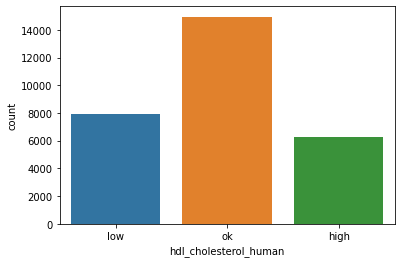

In [13]:
sns.countplot(train["hdl_cholesterol_human"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


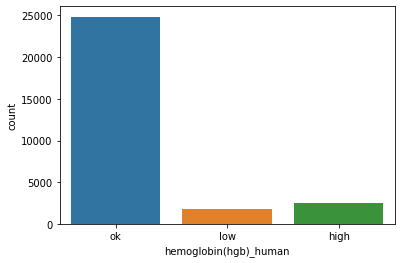

In [14]:
sns.countplot(train["hemoglobin(hgb)_human"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


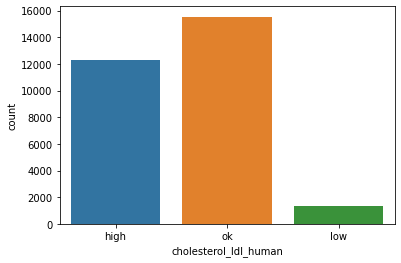

In [15]:
sns.countplot(train["cholesterol_ldl_human"])

## heat map

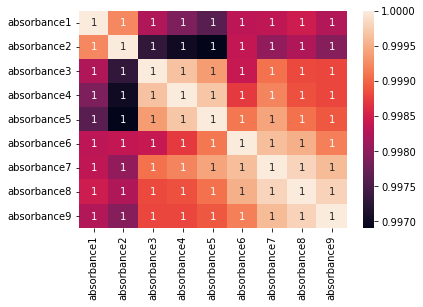

In [16]:
sns.heatmap(train[columns_list[1:10]].corr(),annot=True)

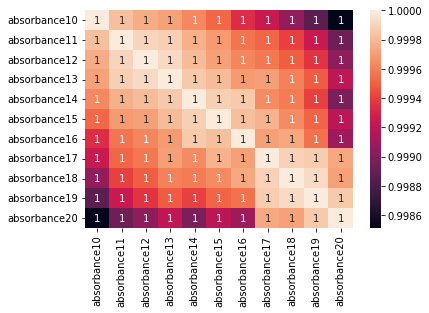

In [17]:
sns.heatmap(train[columns_list[10:21]].corr(),annot=True)

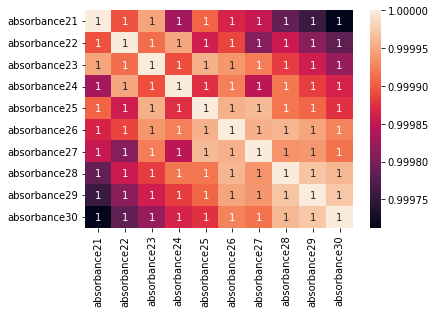

In [18]:
sns.heatmap(train[columns_list[21:31]].corr(),annot=True)

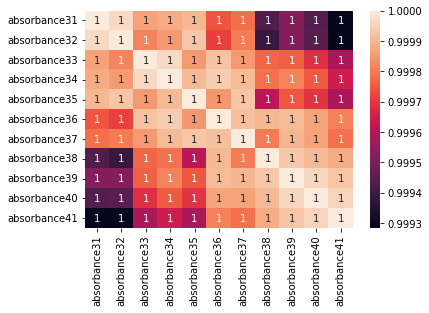

In [19]:
sns.heatmap(train[columns_list[31:42]].corr(),annot=True)

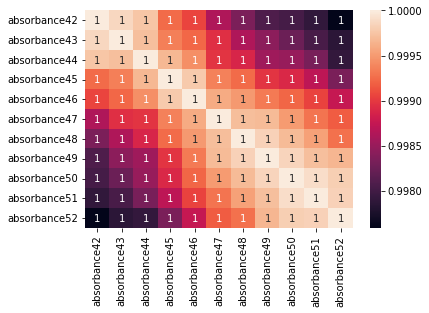

In [20]:
sns.heatmap(train[columns_list[42:53]].corr(),annot=True)

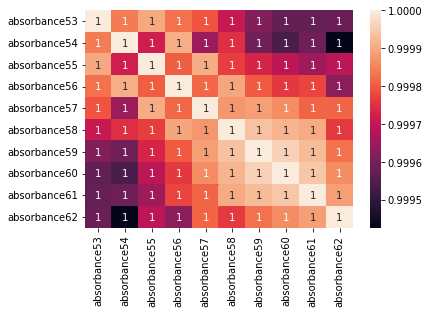

In [21]:
sns.heatmap(train[columns_list[53:63]].corr(),annot=True)

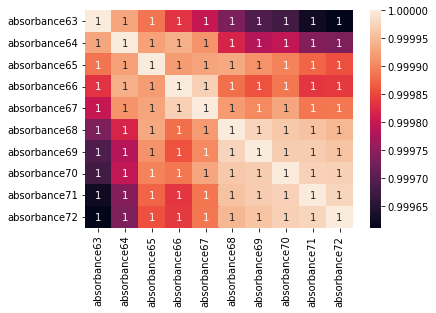

In [22]:
sns.heatmap(train[columns_list[63:73]].corr(),annot=True)

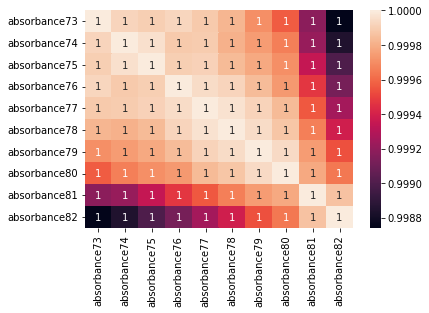

In [23]:
sns.heatmap(train[columns_list[73:83]].corr(),annot=True)

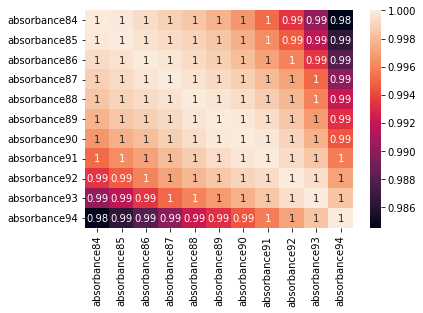

In [24]:
sns.heatmap(train[columns_list[84:95]].corr(),annot=True)

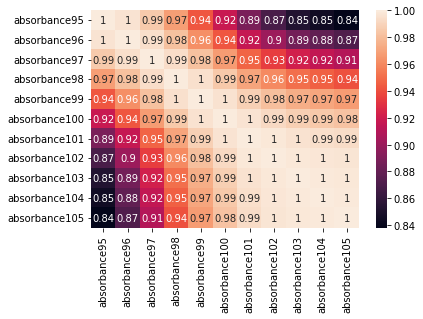

In [25]:
sns.heatmap(train[columns_list[95:106]].corr(),annot=True)

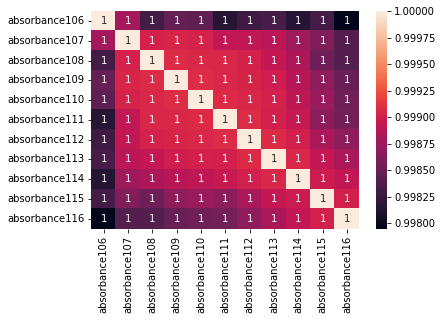

In [26]:
sns.heatmap(train[columns_list[106:117]].corr(),annot=True)

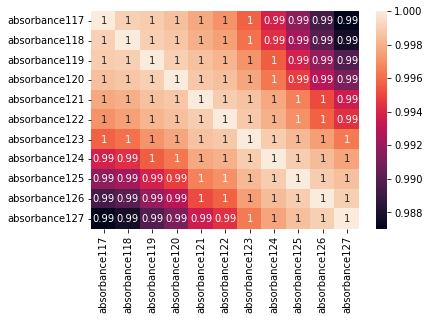

In [27]:
sns.heatmap(train[columns_list[117:128]].corr(),annot=True)

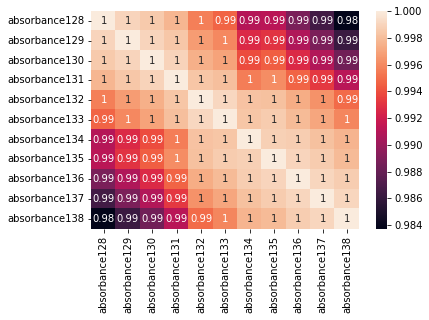

In [28]:
sns.heatmap(train[columns_list[128:139]].corr(),annot=True)

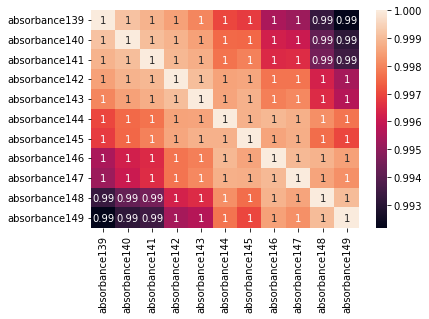

In [29]:
sns.heatmap(train[columns_list[139:150]].corr(),annot=True)

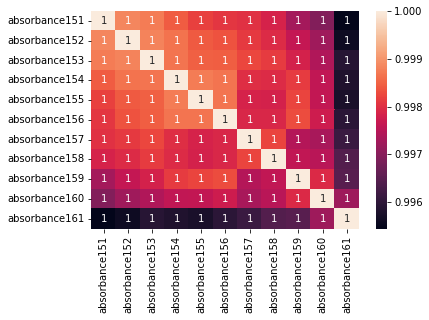

In [30]:
sns.heatmap(train[columns_list[151:162]].corr(),annot=True)

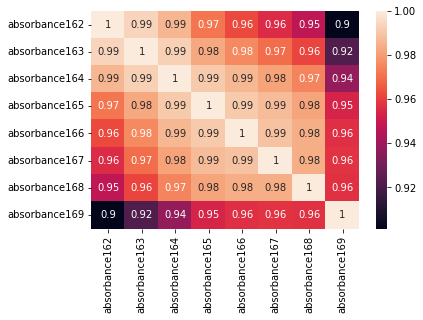

In [31]:
sns.heatmap(train[columns_list[162:170]].corr(),annot=True)

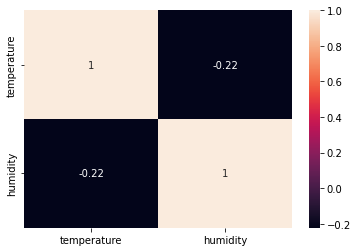

In [32]:
sns.heatmap(train[columns_list[170:172]].corr(),annot=True)

#
# Handling outlier

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 =  col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range


In [34]:
print(numerical_features)

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance162', 'absorbance163', 'absorbance164', 'absorbance165',
       'absorbance166', 'absorbance167', 'absorbance168', 'absorbance169',
       'temperature', 'humidity'],
      dtype='object', length=172)


In [35]:
for feature in numerical_features:
  lower_range, upper_range= remove_outlier(train[feature])
  train.drop(train[(train[feature]> upper_range )].index, inplace = True)
  train.drop(train[(train[feature]< lower_range )].index, inplace = True)

In [36]:
print(numerical_features)

Index(['absorbance0', 'absorbance1', 'absorbance2', 'absorbance3',
       'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7',
       'absorbance8', 'absorbance9',
       ...
       'absorbance162', 'absorbance163', 'absorbance164', 'absorbance165',
       'absorbance166', 'absorbance167', 'absorbance168', 'absorbance169',
       'temperature', 'humidity'],
      dtype='object', length=172)


In [37]:
train.shape

(24921, 175)

In [38]:
train.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,0.600688,0.612949,0.617855,0.621710,0.622049,0.623373,0.620610,0.619479,0.616463,0.612414,0.609885,0.605408,0.602115,0.597710,0.593485,0.592332,0.588680,0.587396,0.585577,0.585244,0.583597,0.584460,0.584548,0.586147,0.589067,0.591360,0.595636,0.599054,0.602856,0.607817,...,1.499864,1.482482,1.478964,1.468505,1.454910,1.434286,1.443249,1.417403,1.418581,1.403326,1.395943,1.386288,1.381532,1.372256,1.367083,1.362999,1.353013,1.345374,1.341283,1.323804,1.331071,1.332295,1.328928,1.309800,1.328064,1.329464,1.314664,1.313583,1.313329,1.312243,1.310330,1.353629,1.336609,1.319344,1.278294,39.27,44.17,low,ok,high
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,0.608619,0.619217,0.625162,0.627111,0.629326,0.628116,0.627815,0.623644,0.620762,0.617781,0.613032,0.610404,0.605528,0.602216,0.598417,0.595489,0.593692,0.591697,0.590110,0.589316,0.589131,0.587455,0.589060,0.589305,0.591252,0.594853,0.598545,0.601338,0.605673,0.610725,...,1.504032,1.495987,1.483166,1.477741,1.457003,1.445143,1.439036,1.434363,1.422782,1.408831,1.405730,1.394905,1.386579,1.373887,1.376208,1.360633,1.358802,1.353009,1.344997,1.332883,1.324965,1.339512,1.336343,1.322957,1.311612,1.316437,1.316180,1.316063,1.320698,1.321068,1.286939,1.301804,1.314457,1.282723,1.267465,39.39,44.09,low,ok,high
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,0.607972,0.617558,0.624398,0.626222,0.627771,0.626445,0.623953,0.622616,0.618701,0.615181,0.611624,0.608587,0.605730,0.601288,0.597154,0.595654,0.592535,0.591893,0.589885,0.588528,0.587108,0.586997,0.589043,0.588888,0.591670,0.594962,0.597498,0.600767,0.604963,0.612166,...,1.504365,1.494083,1.488401,1.468838,1.456374,1.450920,1.438182,1.434188,1.427201,1.413866,1.403336,1.404049,1.383698,1.378195,1.374761,1.373550,1.362671,1.350157,1.344038,1.341004,1.335655,1.333660,1.325491,1.335868,1.334114,1.327512,1.339627,1.322394,1.328299,1.311948,1.310330,1.311108,1.283048,1.287730,1.266464,39.50,44.00,low,ok,high
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,0.607109,0.616252,0.622437,0.625715,0.626799,0.625676,0.625084,0.622652,0.618510,0.614896,0.611060,0.608285,0.603976,0.600319,0.596856,0.594169,0.591334,0.589620,0.589549,0.587194,0.586685,0.587205,0.587368,0.588510,0.592029,0.593472,0.597904,0.601190,0.604864,0.610652,...,1.507148,1.505552,1.486796,1.474065,1.456521,1.456408,1.445327,1.429233,1.422914,1.422161,1.405341,1.403060,1.390475,1.381461,1.370967,1.370843,1.358100,1.362090,1.352020,1.340746,1.345123,1.332574,1.345660,1.349603,1.329325,1.331542,1.347718,1.321111,1.320285,1.303363,1.306762,1.297632,1.314811,1.314408,1.342224,39.60,43.89,low,ok,high
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592

## Feature scaling

In [39]:
train_np = np.array(train)

In [40]:

labels = train_np[:, 172:175]
labels_n = np.zeros(labels.shape)
labels_n[np.where(labels=='low')] = 0
labels_n[np.where(labels=='ok')] = 1
labels_n[np.where(labels=='high')] = 2


In [41]:
labels_n.shape

(24921, 3)

In [42]:
labels_n

array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.],
       ...,
       [0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])

# modeling

## RandomForestClassifier

In [43]:
train.head()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,0.600688,0.612949,0.617855,0.621710,0.622049,0.623373,0.620610,0.619479,0.616463,0.612414,0.609885,0.605408,0.602115,0.597710,0.593485,0.592332,0.588680,0.587396,0.585577,0.585244,0.583597,0.584460,0.584548,0.586147,0.589067,0.591360,0.595636,0.599054,0.602856,0.607817,...,1.499864,1.482482,1.478964,1.468505,1.454910,1.434286,1.443249,1.417403,1.418581,1.403326,1.395943,1.386288,1.381532,1.372256,1.367083,1.362999,1.353013,1.345374,1.341283,1.323804,1.331071,1.332295,1.328928,1.309800,1.328064,1.329464,1.314664,1.313583,1.313329,1.312243,1.310330,1.353629,1.336609,1.319344,1.278294,39.27,44.17,low,ok,high
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,0.608619,0.619217,0.625162,0.627111,0.629326,0.628116,0.627815,0.623644,0.620762,0.617781,0.613032,0.610404,0.605528,0.602216,0.598417,0.595489,0.593692,0.591697,0.590110,0.589316,0.589131,0.587455,0.589060,0.589305,0.591252,0.594853,0.598545,0.601338,0.605673,0.610725,...,1.504032,1.495987,1.483166,1.477741,1.457003,1.445143,1.439036,1.434363,1.422782,1.408831,1.405730,1.394905,1.386579,1.373887,1.376208,1.360633,1.358802,1.353009,1.344997,1.332883,1.324965,1.339512,1.336343,1.322957,1.311612,1.316437,1.316180,1.316063,1.320698,1.321068,1.286939,1.301804,1.314457,1.282723,1.267465,39.39,44.09,low,ok,high
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,0.607972,0.617558,0.624398,0.626222,0.627771,0.626445,0.623953,0.622616,0.618701,0.615181,0.611624,0.608587,0.605730,0.601288,0.597154,0.595654,0.592535,0.591893,0.589885,0.588528,0.587108,0.586997,0.589043,0.588888,0.591670,0.594962,0.597498,0.600767,0.604963,0.612166,...,1.504365,1.494083,1.488401,1.468838,1.456374,1.450920,1.438182,1.434188,1.427201,1.413866,1.403336,1.404049,1.383698,1.378195,1.374761,1.373550,1.362671,1.350157,1.344038,1.341004,1.335655,1.333660,1.325491,1.335868,1.334114,1.327512,1.339627,1.322394,1.328299,1.311948,1.310330,1.311108,1.283048,1.287730,1.266464,39.50,44.00,low,ok,high
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,0.607109,0.616252,0.622437,0.625715,0.626799,0.625676,0.625084,0.622652,0.618510,0.614896,0.611060,0.608285,0.603976,0.600319,0.596856,0.594169,0.591334,0.589620,0.589549,0.587194,0.586685,0.587205,0.587368,0.588510,0.592029,0.593472,0.597904,0.601190,0.604864,0.610652,...,1.507148,1.505552,1.486796,1.474065,1.456521,1.456408,1.445327,1.429233,1.422914,1.422161,1.405341,1.403060,1.390475,1.381461,1.370967,1.370843,1.358100,1.362090,1.352020,1.340746,1.345123,1.332574,1.345660,1.349603,1.329325,1.331542,1.347718,1.321111,1.320285,1.303363,1.306762,1.297632,1.314811,1.314408,1.342224,39.60,43.89,low,ok,high
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592

In [43]:
idx_train = train.donation_id.values
train.drop(["donation_id"], axis=1, inplace=True)
train= train.to_numpy()

In [44]:
#idx_val = x_val.donation_id.values
#x_val.drop(["donation_id"], axis=1, inplace=True)
#x_val= x_val.to_numpy()

In [45]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle


In [46]:
forest = RandomForestClassifier(n_estimators=500)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

model_random_forest = multi_target_forest.fit(train[numerical_features],labels_n )

In [ ]:
model_random_forest

In [47]:
def mymodel(features,model):
    output = model.predict(features)
    return output

In [48]:
def transform(value):
    if value == 0.0:
        return 'low'
    elif value == 1.0:
        return 'ok'
    else:
        return 'high'
        

In [49]:
def transform_c_hdl(row):
    return str(row["Donation_ID"]) + "_hdl_cholesterol_human" + "-" +  row["hdl_cholesterol_human"]

In [50]:
def transform_hemo(row):
    return str(row["Donation_ID"]) + "_hemoglobin(hgb)_human" +  "-" + row["hemoglobin(hgb)_human"]

In [51]:
def transform_c_ldl(row):
    return str(row["Donation_ID"]) + "_cholesterol_ldl_human" +  "-" + row["cholesterol_ldl_human"]

### predict on test set

In [52]:
test_df = pd.read_csv(testcsv)
test_df.head()

,Reading_ID,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,...,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity
0,ID_KWUAQLRM,ID_2982,0.517951,0.520508,0.526852,0.531611,0.536816,0.543828,0.547761,0.554379,0.565622,0.575762,0.590253,0.600692,0.605104,0.608611,0.608169,0.606985,0.606590,0.603814,0.600409,0.597802,0.593389,0.589956,0.585429,0.583659,0.578307,0.574303,0.571248,0.570985,0.568520,0.566437,0.564261,0.563907,0.563427,0.564336,0.565472,0.567827,0.570957,0.572206,...,1.416794,1.402706,1.391447,1.385020,1.373256,1.362781,1.345200,1.341810,1.333717,1.328438,1.313325,1.305895,1.293996,1.292892,1.285608,1.275789,1.267682,1.263906,1.259461,1.249615,1.244618,1.242537,1.238426,1.233983,1.235212,1.234433,1.234971,1.223950,1.235415,1.234605,1.226695,1.210430,1.214422,1.200332,1.198297,1.248182,0,0.0027,37.09,27.22
1,ID_FN8SIVJJ,ID_2982,0.517839,0.522367,0.525186,0.534661,0.541900,0.546180,0.551687,0.556753,0.566446,0.578208,0.591039,0.601620,0.605895,0.609568,0.610188,0.608635,0.607716,0.606237,0.601746,0.597047,0.594703,0.591059,0.587887,0.582815,0.578746,0.576693,0.573624,0.571268,0.569092,0.567672,0.565814,0.564862,0.564965,0.565536,0.565475,0.567822,0.571052,0.572733,...,1.417710,1.406884,1.395073,1.387243,1.377109,1.362596,1.350712,1.343471,1.334255,1.320115,1.316767,1.305150,1.289700,1.286014,1.284353,1.274027,1.274710,1.263676,1.255490,1.256831,1.246188,1.236320,1.242136,1.234657,1.233898,1.234317,1.232710,1.238981,1.237033,1.237152,1.219627,1.216220,1.191416,1.202515,1.211942,1.242939,1,0.0027,37.20,27.17
2,ID_CI4TQCHI,ID_2982,0.517702,0.522018,0.527237,0.534374,0.541155,0.547152,0.549837,0.557513,0.566793,0.580574,0.592258,0.601226,0.608085,0.611143,0.611085,0.608700,0.608647,0.605048,0.601668,0.598030,0.595072,0.591417,0.587822,0.584160,0.579395,0.576524,0.574158,0.572215,0.569473,0.566740,0.565881,0.565431,0.565380,0.565508,0.566487,0.568591,0.570932,0.573199,...,1.414933,1.405205,1.395040,1.381880,1.377176,1.360407,1.350644,1.368027,1.338249,1.322779,1.313343,1.300640,1.295481,1.286947,1.283352,1.276702,1.270998,1.262507,1.259525,1.253063,1.247183,1.245595,1.248910,1.239302,1.236558,1.237110,1.239622,1.228925,1.240135,1.238346,1.237193,1.208477,1.208721,1.187810,1.209599,1.175631,2,0.0027,37.30,27.07
3,ID_URJMKNU7,ID_2982,0.525008,0.527439,0.536871,0.539636,0.546555,0.553183,0.558826,0.563549,0.575675,0.587214,0.597155,0.606784,0.612443,0.615604,0.616249,0.615097,0.614963,0.611250,0.608559,0.603462,0.599570,0.597532,0.593608,0.588978,0.584560,0.581973,0.578872,0.576858,0.573706,0.571340,0.570279,0.570198,0.568850,0.569583,0.570136,0.571026,0.574510,0.575988,...,1.417360,1.403515,1.401420,1.382891,1.377412,1.357813,1.352627,1.344537,1.334463,1.323303,1.313057,1.304806,1.299465,1.296792,1.286711,1.273948,1.272122,1.260676,1.255276,1.257032,1.244043,1.246127,1.238651,1.236244,1.243770,1.237752,1.229684,1.228355,1.234852,1.220159,1.218532,1.185708,1.196750,1.222484,1.177406,1.198399,3,0.0027,37.38,26.98
4,ID_HBJH67IS,ID_2982,0.520532,0.522683,0.526842,0.534634,0.539676,0.547488,0.552688,0.558355,0.568959,0

In [53]:
test_df.columns

Index(['Reading_ID', 'donation_id', 'absorbance0', 'absorbance1',
       'absorbance2', 'absorbance3', 'absorbance4', 'absorbance5',
       'absorbance6', 'absorbance7',
       ...
       'absorbance164', 'absorbance165', 'absorbance166', 'absorbance167',
       'absorbance168', 'absorbance169', 'id', 'std', 'temperature',
       'humidity'],
      dtype='object', length=176)

In [54]:
# save it ids before dropping them
idx = test_df.donation_id.values
test_df.drop(["Reading_ID","donation_id","id","std"], axis=1, inplace=True)
test= test_df.to_numpy()

In [55]:
test_df.shape

(3660, 172)

In [56]:
test_df

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,absorbance10,absorbance11,absorbance12,absorbance13,absorbance14,absorbance15,absorbance16,absorbance17,absorbance18,absorbance19,absorbance20,absorbance21,absorbance22,absorbance23,absorbance24,absorbance25,absorbance26,absorbance27,absorbance28,absorbance29,absorbance30,absorbance31,absorbance32,absorbance33,absorbance34,absorbance35,absorbance36,absorbance37,absorbance38,absorbance39,...,absorbance132,absorbance133,absorbance134,absorbance135,absorbance136,absorbance137,absorbance138,absorbance139,absorbance140,absorbance141,absorbance142,absorbance143,absorbance144,absorbance145,absorbance146,absorbance147,absorbance148,absorbance149,absorbance150,absorbance151,absorbance152,absorbance153,absorbance154,absorbance155,absorbance156,absorbance157,absorbance158,absorbance159,absorbance160,absorbance161,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,0.517951,0.520508,0.526852,0.531611,0.536816,0.543828,0.547761,0.554379,0.565622,0.575762,0.590253,0.600692,0.605104,0.608611,0.608169,0.606985,0.606590,0.603814,0.600409,0.597802,0.593389,0.589956,0.585429,0.583659,0.578307,0.574303,0.571248,0.570985,0.568520,0.566437,0.564261,0.563907,0.563427,0.564336,0.565472,0.567827,0.570957,0.572206,0.576374,0.578900,...,1.441030,1.427545,1.416794,1.402706,1.391447,1.385020,1.373256,1.362781,1.345200,1.341810,1.333717,1.328438,1.313325,1.305895,1.293996,1.292892,1.285608,1.275789,1.267682,1.263906,1.259461,1.249615,1.244618,1.242537,1.238426,1.233983,1.235212,1.234433,1.234971,1.223950,1.235415,1.234605,1.226695,1.210430,1.214422,1.200332,1.198297,1.248182,37.09,27.22
1,0.517839,0.522367,0.525186,0.534661,0.541900,0.546180,0.551687,0.556753,0.566446,0.578208,0.591039,0.601620,0.605895,0.609568,0.610188,0.608635,0.607716,0.606237,0.601746,0.597047,0.594703,0.591059,0.587887,0.582815,0.578746,0.576693,0.573624,0.571268,0.569092,0.567672,0.565814,0.564862,0.564965,0.565536,0.565475,0.567822,0.571052,0.572733,0.576857,0.580138,...,1.437012,1.427877,1.417710,1.406884,1.395073,1.387243,1.377109,1.362596,1.350712,1.343471,1.334255,1.320115,1.316767,1.305150,1.289700,1.286014,1.284353,1.274027,1.274710,1.263676,1.255490,1.256831,1.246188,1.236320,1.242136,1.234657,1.233898,1.234317,1.232710,1.238981,1.237033,1.237152,1.219627,1.216220,1.191416,1.202515,1.211942,1.242939,37.20,27.17
2,0.517702,0.522018,0.527237,0.534374,0.541155,0.547152,0.549837,0.557513,0.566793,0.580574,0.592258,0.601226,0.608085,0.611143,0.611085,0.608700,0.608647,0.605048,0.601668,0.598030,0.595072,0.591417,0.587822,0.584160,0.579395,0.576524,0.574158,0.572215,0.569473,0.566740,0.565881,0.565431,0.565380,0.565508,0.566487,0.568591,0.570932,0.573199,0.577526,0.580129,...,1.438691,1.430274,1.414933,1.405205,1.395040,1.381880,1.377176,1.360407,1.350644,1.368027,1.338249,1.322779,1.313343,1.300640,1.295481,1.286947,1.283352,1.276702,1.270998,1.262507,1.259525,1.253063,1.247183,1.245595,1.248910,1.239302,1.236558,1.237110,1.239622,1.228925,1.240135,1.238346,1.237193,1.208477,1.208721,1.187810,1.209599,1.175631,37.30,27.07
3,0.525008,0.527439,0.536871,0.539636,0.546555,0.553183,0.558826,0.563549,0.575675,0.587214,0.597155,0.606784,0.612443,0.615604,0.616249,0.615097,0.614963,0.611250,0.608559,0.603462,0.599570,0.597532,0.593608,0.588978,0.584560,0.581973,0.578872,0.576858,0.573706,0.571340,0.570279,0.570198,0.568850,0.569583,0.570136,0.571026,0.574510,0.575988,0.579174,0.582384,...,1.439258,1.429390,1.417360,1.403515,1.401420,1.382891,1.377412,1.357813,1.352627,1.344537,1.334463,1.323303,1.313057,1.304806,1.299465,1.296792,1.286711,1.273948,1.272122,1.260676,1.255276,1.257032,1.244043,1.246127,1.238651,1.236244,1.243770,1.237752,1.229684,1.228355,1.234852,1.220159,1.218532,1.185708,1.196750,1.222484,1.177406,1.198399,37.38,26.98
4,0.520532,0.522683,0.526842,0.534634,0.539676,0.547

In [57]:
predictions_forest = mymodel(test_df,model_random_forest)

# Save the results to csv
ss = pd.DataFrame()
ss["Donation_ID"] = idx # don't messed up the ids. save them before.
ss["hdl_cholesterol_human"] = predictions_forest[:,0]
ss["hemoglobin(hgb)_human"] = predictions_forest[:,1]
ss["cholesterol_ldl_human"] = predictions_forest[:,2]




In [58]:
ss

,Donation_ID,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_2982,1.0,1.0,1.0
1,ID_2982,1.0,1.0,1.0
2,ID_2982,0.0,1.0,1.0
3,ID_2982,0.0,1.0,1.0
4,ID_2982,0.0,1.0,1.0
...,...,...,...,...
3655,ID_3637,1.0,0.0,1.0
3656,ID_3637,1.0,0.0,1.0
3657,ID_3637,1.0,0.0,1.0
3658,ID_3637,1.0,1.0,1.0


In [59]:
ss["hdl_cholesterol_human"] = ss["hdl_cholesterol_human"].apply(lambda x: transform(x))
ss["hemoglobin(hgb)_human"] = ss["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
ss["cholesterol_ldl_human"] = ss["cholesterol_ldl_human"].apply(lambda x: transform(x))

In [60]:
hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))

In [61]:
hemo_rows = pd.DataFrame(ss.apply(transform_hemo, axis=1))

In [62]:
ldl_rows = pd.DataFrame(ss.apply(transform_c_ldl, axis=1))

In [63]:
ss = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)

In [64]:
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])

In [65]:
ss = ss.rename(columns={0:"Donation_ID "})

In [66]:
ss

,Donation_ID,target
0,ID_2982_hdl_cholesterol_human,ok
1,ID_2982_hdl_cholesterol_human,ok
2,ID_2982_hdl_cholesterol_human,low
3,ID_2982_hdl_cholesterol_human,low
4,ID_2982_hdl_cholesterol_human,low
...,...,...
10975,ID_3637_cholesterol_ldl_human,ok
10976,ID_3637_cholesterol_ldl_human,ok
10977,ID_3637_cholesterol_ldl_human,ok
10978,ID_3637_cholesterol_ldl_human,ok


In [67]:

ss.to_csv(maindir+"/random_forest9.csv", index=False) # got 0.4777 accuracy

## xgboost

In [ ]:
import xgboost as xgb


In [ ]:
xgboost =xgb.XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 10)

multi_target_forest = MultiOutputClassifier(xgboost, n_jobs=-1)
model = multi_target_forest.fit(x_train, y_train)

In [ ]:
type(standardized_test)

In [ ]:
type(x_train)

In [ ]:
test_np = standardized_test.to_numpy()

In [ ]:
predictions = mymodel(test_np, model)
# Save the results to csv
ss = pd.DataFrame()
ss["Reading_ID"] = idx # don't messed up the ids. save them before.
ss["hdl_cholesterol_human"] = predictions[:,0]
ss["hemoglobin(hgb)_human"] = predictions[:,1]
ss["cholesterol_ldl_human"] = predictions[:,2]

In [ ]:

        

ss["hdl_cholesterol_human"] = ss["hdl_cholesterol_human"].apply(lambda x: transform(x))
ss["hemoglobin(hgb)_human"] = ss["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
ss["cholesterol_ldl_human"] = ss["cholesterol_ldl_human"].apply(lambda x: transform(x))



hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))



hemo_rows = pd.DataFrame(ss.apply(transform_hemo, axis=1))



ldl_rows = pd.DataFrame(ss.apply(transform_c_ldl, axis=1))
ss = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])
ss = ss.rename(columns={0:"Reading_ID"})

ss.to_csv(maindir+"/submission8.csv", index=False)

# modeling with remained feature

In [ ]:
remaind_feature

In [ ]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import xgboost as xgb

In [ ]:

xgboost =xgb.XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 10)

multi_target_forest = MultiOutputClassifier(xgboost, n_jobs=-1)
train_np = standardized_data[remaind_feature].to_numpy()
model = multi_target_forest.fit(train_np,labels_n)

test_df = pd.read_csv(testcsv)
idx = test_df.Reading_ID.values

scaler = StandardScaler()
arr = scaler.fit_transform(test_df[numerical_features])
standardized_test = pd.DataFrame(arr, columns=train[numerical_features].columns)


standardized_test2= standardized_test[remaind_feature]
test_np = standardized_test2.to_numpy()
predictions = mymodel(test_np, model)
# Save the results to csv
ss = pd.DataFrame()
ss["Reading_ID"] = idx # don't messed up the ids. save them before.
ss["hdl_cholesterol_human"] = predictions[:,0]
ss["hemoglobin(hgb)_human"] = predictions[:,1]
ss["cholesterol_ldl_human"] = predictions[:,2]


ss["hdl_cholesterol_human"] = ss["hdl_cholesterol_human"].apply(lambda x: transform(x))
ss["hemoglobin(hgb)_human"] = ss["hemoglobin(hgb)_human"].apply(lambda x: transform(x))
ss["cholesterol_ldl_human"] = ss["cholesterol_ldl_human"].apply(lambda x: transform(x))



hdl_rows = pd.DataFrame(ss.apply(transform_c_hdl, axis=1))



hemo_rows = pd.DataFrame(ss.apply(transform_hemo, axis=1))



ldl_rows = pd.DataFrame(ss.apply(transform_c_ldl, axis=1))
ss = pd.concat([hdl_rows, hemo_rows, ldl_rows]).reset_index(drop=True)
ss["target"] = ss[0].apply(lambda x: x.split("-")[1])
ss[0] = ss[0].apply(lambda x: x.split("-")[0])
ss = ss.rename(columns={0:"Reading_ID"})

ss.to_csv(maindir+"/submission9.csv", index=False)

In [ ]:
test_np.shape

In [ ]:
standardized_data[remaind_feature].shape